In [ ]:
## Question 1: What is the difference between multithreading and multiprocessing?

In [2]:
# Example that is notebook friendly
# Compare sequential and threads without using processes
import time
from concurrent.futures import ThreadPoolExecutor

def tiny_task(t):
    # Wait to imitate input output
    time.sleep(0.3)
    # Do a tiny cpu loop so it is not empty
    s = 0
    for i in range(10000):
        s += i * i
    return s

# Sequential
start = time.time()
_ = [tiny_task(i) for i in range(6)]
dur_seq = time.time() - start
print(f"Sequential seconds: {dur_seq:.2f}")

# Threads
start = time.time()
with ThreadPoolExecutor(max_workers=6) as ex:
    _ = list(ex.map(tiny_task, range(6)))
dur_thr = time.time() - start
print(f"Threads seconds: {dur_thr:.2f}")

Sequential seconds: 1.81
Threads seconds: 0.32


In [ ]:
## Question 2: What are the challenges associated with memory management in Python?

In [3]:
# Show creation and cleanup of a large list
import sys  # to check size
import gc   # to trigger garbage collection

# Create a large list
big = [i for i in range(500000)]  # half a million integers
print('Approx list size bytes:', sys.getsizeof(big))  # size of the container only
print('First three values:', big[:3])  # peek at data

# Drop the reference so the list can be freed
del big  # remove the only name that pointed to the list

# Force a garbage collection cycle
gc.collect()  # ask the collector to run now
print('Garbage collection requested')  # confirm action

Approx list size bytes: 4167352
First three values: [0, 1, 2]
Garbage collection requested


In [ ]:
## Question 3: Write a Python program that logs an error message to a log file when a division by zero exception occurs.

In [4]:
# Log a division by zero into a file
import logging  # logging writes messages to a file

# Create a basic configuration for logging
logging.basicConfig(filename='assignment_log.log', level=logging.ERROR,
                    format='%(asctime)s %(levelname)s %(message)s')  # set file, level, and format

try:  # start a protected block
    a = 10  # numerator
    b = 0   # denominator set to zero to trigger the error
    c = a / b  # this raises an exception
except ZeroDivisionError as e:  # handle the specific error
    logging.error('Tried to divide by zero', exc_info=True)  # write message and stack trace
    print('The error was logged to assignment_log.log')  # user friendly message

The error was logged to assignment_log.log


In [ ]:
## Question 4: Write a Python program that reads from one file and writes its content to another file.

In [6]:
# Read from a source file and write to a destination file
from pathlib import Path  # path tools for safer file handling

# Create a small source file for the demo
src_path = Path('source_demo.txt')  # path object for the source
with src_path.open('w', encoding='utf-8') as f:  # open for writing text
    f.write('Hello there. This is a short file that we will copy.\n')  # write a line
    f.write('Second line for testing copy.\n')  # write another line

# Define destination path
dst_path = Path('destination_demo.txt')  # new file name

# Now copy by reading then writing
with src_path.open('r', encoding='utf-8') as src:  # open source for reading
    data = src.read()  # read the whole content into memory

with dst_path.open('w', encoding='utf-8') as dst:  # open destination for writing
    dst.write(data)  # write the content

print("Copy complete. Open destination_demo.txt to check.")

Copy complete. Open destination_demo.txt to check.


In [ ]:
## Question 5: Write a program that handles both IndexError and KeyError using a try except block.

In [13]:
# Handle index and key errors with friendly messages
items = [10, 20, 30]  # a short list with three items
record = {'name': 'Anita', 'age': 28}  # a small dictionary

try:  # try the risky operations
    val = items[5]  # this position does not exist
    city = record['city']  # this key does not exist
except IndexError as ie:  # handle missing position
    print('You asked for a position that is outside the list')  # message for index issue
except KeyError as ke:  # handle missing key
    print('You asked for a key that is not present in the dictionary')  # message for key issue
else:  # runs only if no exception
    print('Both lookups worked. Values are', val, city)  # success path
finally:  # runs in every case
    print('Cleanup complete')  # final message

You asked for a position that is outside the list
Cleanup complete


In [ ]:
## Question 6: What are the differences between NumPy arrays and Python lists?

In [7]:
# Compare list and numpy array for simple math and memory
import numpy as np  # numerical library
import sys          # for memory size

py_list = [1, 2, 3, 4]  # a simple list
np_array = np.array([1, 2, 3, 4], dtype=np.int64)  # a numpy array of integers

# Multiply values by two
doubled_list = [x * 2 for x in py_list]  # loop in Python
doubled_array = np_array * 2  # vectorized math in compiled code
print('List result:', doubled_list)  # show list result
print('Array result:', doubled_array)  # show array result

# Compare memory usage
print('List container bytes:', sys.getsizeof(py_list))  # size of list object
print('Array bytes:', np_array.nbytes)  # bytes used by array data

List result: [2, 4, 6, 8]
Array result: [2 4 6 8]
List container bytes: 88
Array bytes: 32


In [ ]:
## Question 7: Explain the difference between apply and map in Pandas.

In [11]:
# Show map on a Series and apply on a DataFrame
import pandas as pd  # data analysis library

# Make a small table
df = pd.DataFrame({"name": ["Arun", "Beena", "Chirag"],"score": [70, 85, 90]})

# Use map to change one Series element by element
curved = df["score"].map(lambda s: s + 5)  # add five to each score
print("Scores after map:")
print(curved)

# Use apply on the DataFrame to change the score column
added = df[["score"]].apply(lambda col: col + 10)  # add ten to the score column
print("\nScores after apply on the score column:")
print(added)

# Use apply on rows to build a sentence for each row
def label_row(row):
    return "{} has score {}".format(row["name"], row["score"])

sentences = df.apply(label_row, axis=1)
print("\nRow labels:")
for line in sentences:
    print(line)

Scores after map:
0    75
1    90
2    95
Name: score, dtype: int64

Scores after apply on the score column:
   score
0     80
1     95
2    100

Row labels:
Arun has score 70
Beena has score 85
Chirag has score 90


In [12]:
df["score_plus5_map"] = df["score"].map(lambda s: s + 5)
df["score_plus10_apply"] = df["score"].apply(lambda s: s + 10)
print("\nTable with new columns:")
print(df)


Table with new columns:
     name  score  score_plus5_map  score_plus10_apply
0    Arun     70               75                  80
1   Beena     85               90                  95
2  Chirag     90               95                 100


In [ ]:
## Question 8: Create a histogram using Seaborn to visualize a distribution.

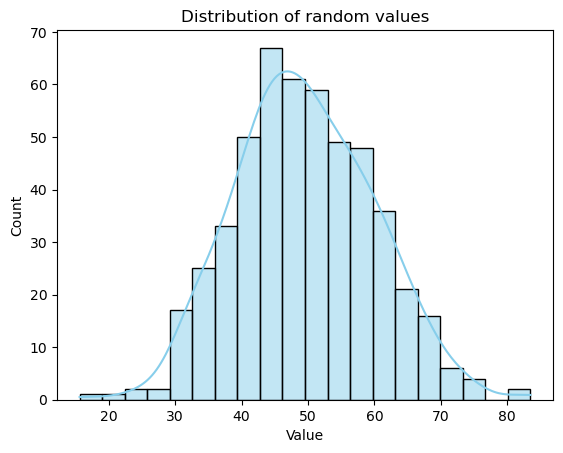

In [15]:
import seaborn as sns  # plotting helper built on Matplotlib
import matplotlib.pyplot as plt  # base plotting library
import numpy as np  # to make random data

data = np.random.normal(loc=50, scale=10, size=500)  # create random numbers around fifty
sns.histplot(data, bins=20, kde=True, color='skyblue')  # draw histogram and density curve
plt.title('Distribution of random values')  # title
plt.xlabel('Value')  # x label
plt.ylabel('Count')  # y label
plt.show()  # display the chart

In [ ]:
## Question 9: Use Pandas to load a CSV file and display its first five rows.

In [16]:
# Create a small CSV then load it and show the first five rows
import pandas as pd  # data library

sample = pd.DataFrame({  # build a tiny table
    'id': [1, 2, 3, 4, 5],
    'name': ['Asha', 'Bala', 'Chirag', 'Dev', 'Esha'],
    'age': [23, 31, 29, 26, 35]
})
sample.to_csv('people.csv', index=False)  # write to a CSV file

df = pd.read_csv('people.csv')  # read the CSV file
print(df.head())  # show the first five rows

   id    name  age
0   1    Asha   23
1   2    Bala   31
2   3  Chirag   29
3   4     Dev   26
4   5    Esha   35


In [ ]:
## Question 10: Calculate the correlation matrix using Seaborn and visualize it with a heatmap.

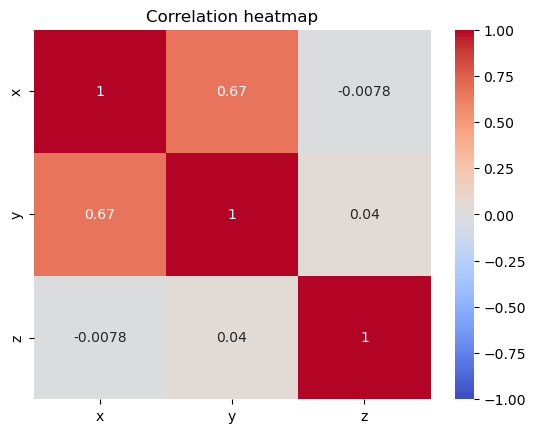

In [17]:
# Compute correlation matrix and plot as heatmap
import numpy as np  # for random numbers
import pandas as pd  # for DataFrame
import seaborn as sns  # for heatmap
import matplotlib.pyplot as plt  # for figure

rng = np.random.default_rng(42)  # random generator
base = rng.normal(0, 1, 300)  # base series
x = base + rng.normal(0, 0.3, 300)  # column related to base
y = base * 0.5 + rng.normal(0, 0.4, 300)  # another related column
z = rng.normal(0, 1, 300)  # mostly independent column
df = pd.DataFrame({'x': x, 'y': y, 'z': z})  # table with three columns
corr = df.corr(numeric_only=True)  # compute correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)  # draw heatmap with labels
plt.title('Correlation heatmap')  # title
plt.show()  # display chart